In [30]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ruamel import yaml
import os
from load_cppimg import load_img
from MOLLI_fit import *
%matplotlib inline

0it [00:00, ?it/s]/home/honght/miniconda3/envs/NUMERICAL/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
21it [00:00, 23.84it/s]/home/honght/undergraduate/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:26: RuntimeWarning: overflow encountered in exp
  return A-B*np.exp(-t/T1)
181it [00:07, 25.82it/s]/home/honght/undergraduate/Flow-Bloch-T1-mapping-cpp/python/MOLLI_fit.py:26: RuntimeWarning: overflow encountered in multiply
  return A-B*np.exp(-t/T1)
4096it [02:25, 28.06it/s]


[[0.70807539 0.71245725 0.72305378 ... 0.72005682 1.32202479 0.72074996]
 [0.69450974 0.75078224 0.71327025 ... 0.70696472 0.75722017 0.72126902]
 [0.72650923 0.71022041 0.71094912 ... 0.74814443 0.72529849 0.71202958]
 ...
 [0.71888539 0.75651368 0.70706664 ... 0.72659347 0.72035218 0.70913153]
 [0.68839937 0.73477359 0.7341455  ... 0.69715342 0.73057146 0.73896379]
 [0.56188904 0.42848657 0.55195438 ... 0.57251048 0.70837888 0.74294436]]


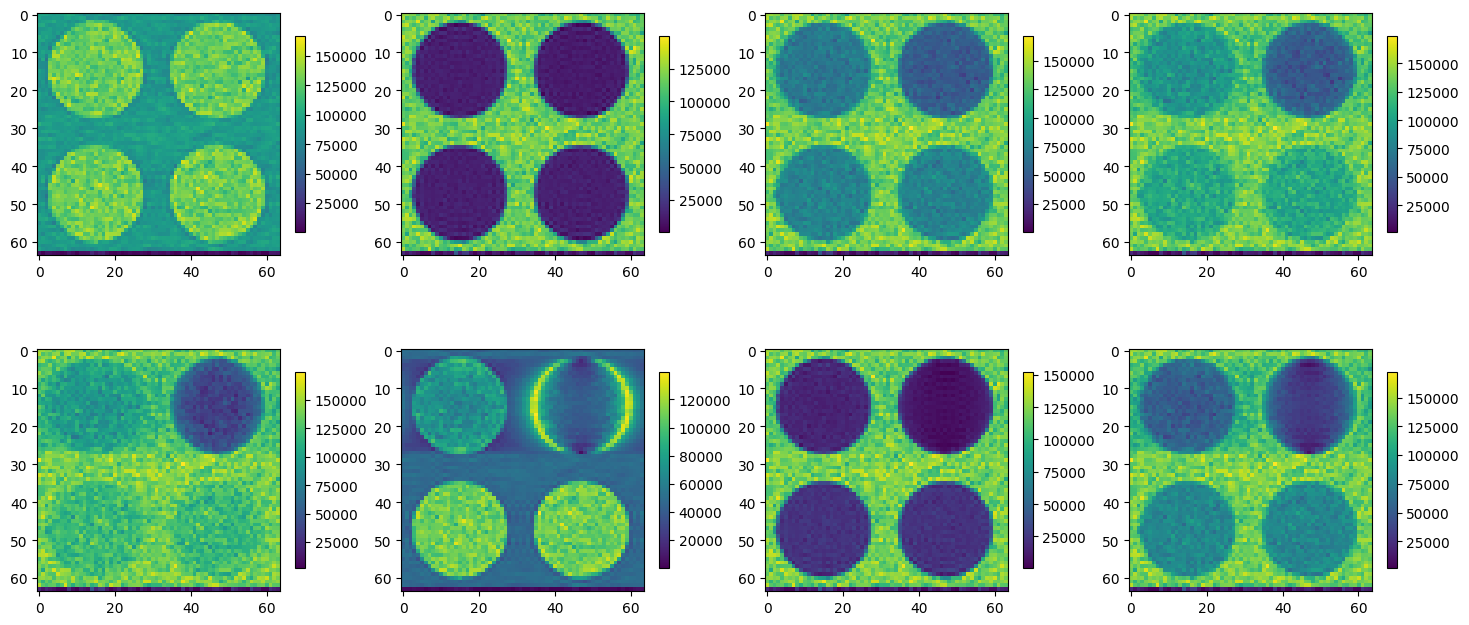

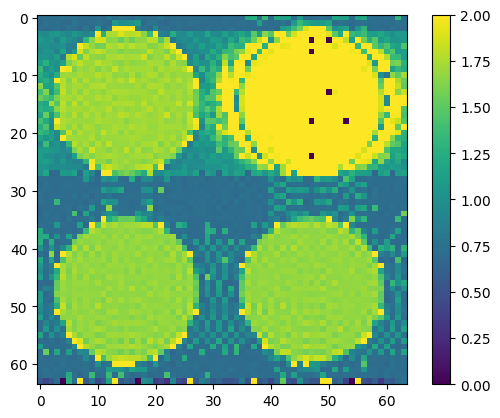

In [42]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA35_FOV256_K64_thick8_center_first", i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA10_FOV320_K64_center_first", i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,2)

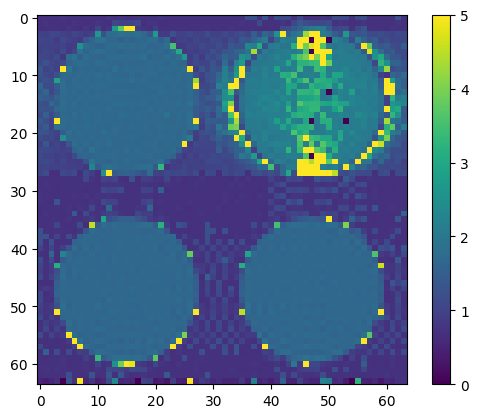

In [43]:
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,5)